In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from datetime import datetime

%matplotlib inline

## Initial Exploration

In [21]:
kclt = pd.read_csv('us-weather-history/KCLT.csv', parse_dates = ['date'], index_col = 'date')

In [22]:
kclt.head()

,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
date,,,,,,,,,,,,
2014-07-01,81,70,91,67,89,56,104,1919,2012,0.00,0.10,5.91
2014-07-02,85,74,95,68,89,56,101,2008,1931,0.00,0.10,1.53
2014-07-03,82,71,93,68,89,56,99,2010,1931,0.14,0.11,2.50
2014-07-04,75,64,86,68,89,55,99,1933,1955,0.00,0.10,2.63
2014-07-05,72,60,84,68,89,57,100,1967,1954,0.00,0.10,1.65


In [10]:
kclt.shape

(365, 12)

In [12]:
print(min(kclt.index))
print(max(kclt.index))

2014-07-01 00:00:00
2015-06-30 00:00:00


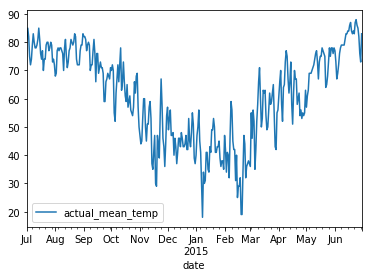

In [23]:
kclt.plot(y = ['actual_mean_temp']);

---
## Load All Weather Data

In [73]:
# Use glob to get all weather files
all_files = glob.glob('us-weather-history/*.csv')

weather = pd.read_csv(all_files[0], parse_dates = ['date'])
weather['station'] = all_files[0].split('/')[1].split('.')[0]


for file in all_files[1:]:
        
    # read csv file as dataframe and append to weather
    temp = pd.read_csv(file, parse_dates = ['date'])
    temp['station'] = file.split('/')[1].split('.')[0]
    weather = weather.append(temp)

#create index based on station and date
weather['new_index'] = weather['station'] + '_' + weather['date'].apply(lambda x: x.strftime('%Y-%m-%d'))
weather.set_index('new_index', inplace = True)

---
## Weather Visualizations

### Count days with high temperature above the average high temperature

In [76]:
def is_high_above_average_high(x):
    return x['actual_max_temp'] > x['average_max_temp']

In [79]:
weather['is_high_above_average_high'] = weather.apply(is_high_above_average_high, axis = 1)

In [102]:
count_high_above_average_high = weather.groupby(by = 'station') \
                                       .agg('sum') \
                                       .sort_values('is_high_above_average_high') \
                                       ['is_high_above_average_high']

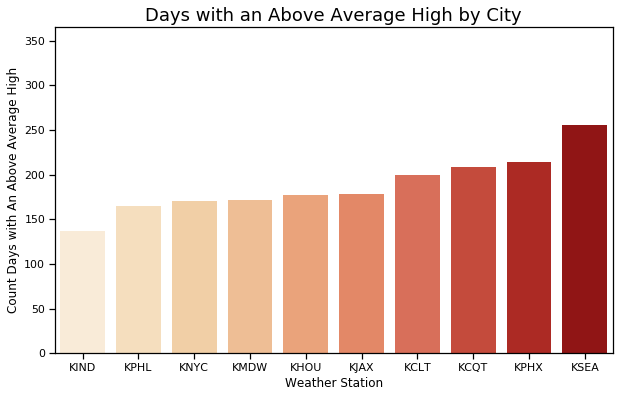

In [269]:
sns.set_context('notebook')
plt.figure(figsize=(10,6))
sns.barplot(x = count_high_above_average_high.index,
            y = count_high_above_average_high.values,
            palette = 'OrRd')
plt.ylim((0, 365))
plt.title('Days with an Above Average High by City', fontdict = {'fontsize': 18})
plt.ylabel('Count Days with An Above Average High')
plt.xlabel('Weather Station')
plt.savefig('plots/days_with_an_above_average_high_by_city.png');

It appears that Seattle had a relatively hot year while Indianapolis had a relatively cool year.

### Count days when a record high was set

In [131]:
def is_record_high(x):
    return x['date'].year == x['record_max_temp_year']

In [134]:
weather['is_record_high'] = weather.apply(is_record_high, axis = 1)

In [135]:
count_record_high_days = weather.groupby(by = 'station') \
                                .agg('sum') \
                                .sort_values('is_record_high') \
                                ['is_record_high']

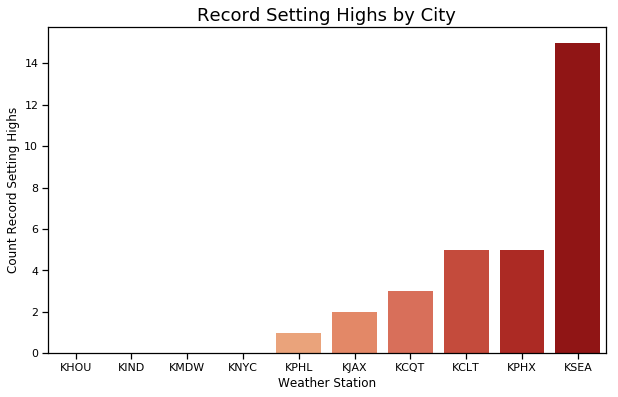

In [274]:
sns.set_context('notebook')
plt.figure(figsize=(10,6))
sns.barplot(x = count_record_high_days.index,
            y = count_record_high_days.values,
            palette = 'OrRd')
plt.title('Record Setting Highs by City', fontdict = {'fontsize': 18})
plt.ylabel('Count Record Setting Highs')
plt.xlabel('Weather Station')
plt.savefig('plots/record_setting_highs_by_city.png');

Seattle had 15 days with record setting highs! It really was a hot year.

### Which were the relatively hotest months for Seattle

In [145]:
seattle = weather[weather['station'] == 'KSEA']

In [147]:
def difference_from_average_high(x):
    return x['actual_max_temp'] - x['average_max_temp']

In [148]:
seattle['difference_from_average_high'] = seattle.apply(difference_from_average_high, axis = 1)

/Users/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [149]:
seattle['month'] = seattle['date'].apply(lambda x: x.month)

/Users/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


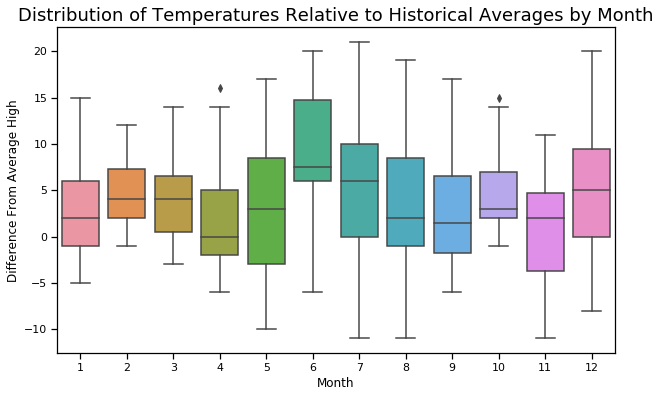

In [275]:
sns.set_context('notebook')
plt.figure(figsize=(10,6))
sns.boxplot(data = seattle, x = 'month', y = 'difference_from_average_high')
plt.title('Distribution of Temperatures Relative to Historical Averages by Month', fontdict = {'fontsize': 18})
plt.ylabel('Difference From Average High')
plt.xlabel('Month')
plt.savefig('plots/distribution_of_temperatures_relative_to_historical_averages_by_month.png');

The median temperature for every month was greater than the historical average, and it appears that June, July, and December were the hotest months relative to historical averages.

### Count days with snow
consider a day with snow to be a day with average temp below 32 and precipitation > 0

In [178]:
def is_snow_day(x):
    return (x['actual_mean_temp'] < 32 and x['actual_precipitation'] > 0)

In [179]:
weather['is_snow_day'] = weather.apply(is_snow_day, axis = 1)

In [180]:
count_snow_days = weather.groupby(by = 'station') \
                         .agg('sum') \
                         .sort_values('is_snow_day') \
                         ['is_snow_day']

In [181]:
count_snow_days

station
KCQT     0.0
KHOU     0.0
KJAX     0.0
KPHX     0.0
KSEA     0.0
KCLT     3.0
KPHL    12.0
KMDW    15.0
KNYC    15.0
KIND    22.0
Name: is_snow_day, dtype: float64

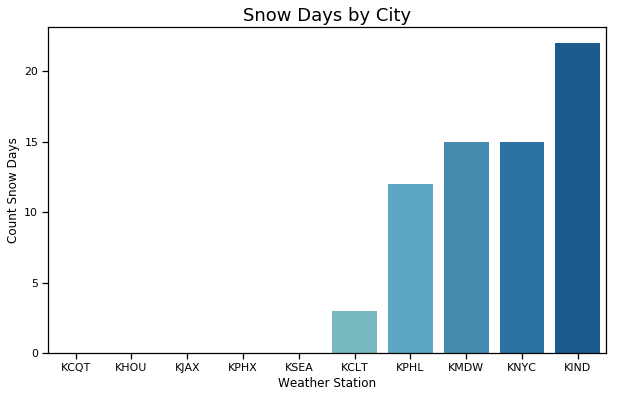

In [276]:
sns.set_context('notebook')
plt.figure(figsize=(10,6))
sns.barplot(x = count_snow_days.index,
            y = count_snow_days.values,
            palette = 'GnBu')
plt.title('Snow Days by City', fontdict = {'fontsize': 18})
plt.ylabel('Count Snow Days')
plt.xlabel('Weather Station')
plt.savefig('plots/snow_days_by_city.png');

Indianna had the most days with snow

---

## Combinine Weather Data with Chicago Subway Ridership

Chicago ridership data accessed from the [Chicago Data Portal](https://data.cityofchicago.org/Transportation/CTA-Ridership-L-Station-Entries-Daily-Totals/5neh-572f)

The KMDW station is a weather station at the Chicago Meadowlands Airport

### Ridership and Temperature

In [196]:
ridership = pd.read_csv('extra-data/CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv', parse_dates = ['date'])
chicago = weather[weather['station'] == 'KMDW']

In [199]:
# Aggregate riders by day for all L-stations and merge to our dataframe with chicago weather information
riders_by_day = ridership[['date', 'rides']].groupby(by = 'date') \
                                            .agg('sum')

chicago = chicago.merge(riders_by_day, on = 'date')

In [215]:
# Aggregate data by week to make for a smoother visualization
def year_and_week(x):
    return x['date'].year * 100 + x['date'].week

chicago['year_and_week'] = chicago.apply(year_and_week, axis = 1)

cols = ['year_and_week', 'rides', 'actual_mean_temp', 'date']
chicago_by_week = chicago[cols].groupby(by = 'year_and_week') \
                                .agg({'rides': 'mean', 'actual_mean_temp': 'mean', 'date': 'min'}) \
                                .sort_values('date')
                          

In [242]:
chicago_by_week['1k_rides'] = chicago_by_week['rides'] / 1000

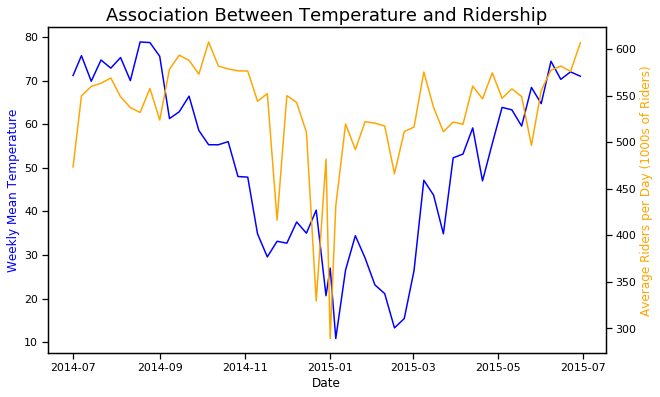

In [277]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = sns.lineplot(data = chicago_by_week, x = 'date', y = 'actual_mean_temp', color = 'b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Weekly Mean Temperature', color = 'b')
ax2 = ax1.twinx()
ax2 = sns.lineplot(data = chicago_by_week, x = 'date', y = '1k_rides', color = 'orange')
ax2.set_ylabel('Average Riders per Day (1000s of Riders)', color = 'orange')
plt.title('Association Between Temperature and Ridership', fontdict = {'fontsize': 18})
plt.savefig('plots/association_between_temperature_and_ridership.png');


In [256]:
# This shows that there is some positive correlation between temperature and ridership, but the correlation is fairly weak.
np.corrcoef(x = chicago['actual_mean_temp'], y = chicago['rides'])[0][1]

0.1361989859534547

Here we can see that there is some association between temperature and number of subway riders. However this association does not appear to be especially strong. We can also see large drops in ridership around the Thanksgiving, Christmas, and New Years Holidays.

### Ridership and Precipitation

Does ridership decrease on rainy days?

In [258]:
# label rainy days as any day with precipitation greater than 0.1
chicago['is_rainy_day'] = chicago['actual_precipitation'].apply(lambda x: x > 0.1)

In [259]:
# 66 rainy days
chicago['is_rainy_day'].sum()

66

In [262]:
riders_by_is_rainy_day = chicago[['is_rainy_day', 'rides']].groupby(by = 'is_rainy_day') \
                                                           .agg(['mean', 'count'])

In [263]:
riders_by_is_rainy_day

rides      
                       mean count
is_rainy_day                     
False         536051.237458   299
True          529270.318182    66

It appears that drop in ridership on rainy days is quite low. Let's test whether this difference is statistically significant

In [265]:
from statsmodels.stats.weightstats import ztest

In [264]:
rainy_days = chicago[chicago['is_rainy_day'] == True]['rides']
not_rainy_days = chicago[chicago['is_rainy_day'] == False]['rides']

In [268]:
results = ztest(x1 = rainy_days, x2 = not_rainy_days)
print("test statistic: ", round(results[0], 3))
print("p-value: ", round(results[1], 3))

test statistic:  -0.341
p-value:  0.733


The difference in ridership between rainy and non rainy days, statistically speaking, is quite insignificant. It may be still possible to find a significant difference if the threshold for a "rainy" day is raised above 0.1.